<a href="https://colab.research.google.com/github/Hammy25/DataPreprocessing/blob/master/DataScience_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

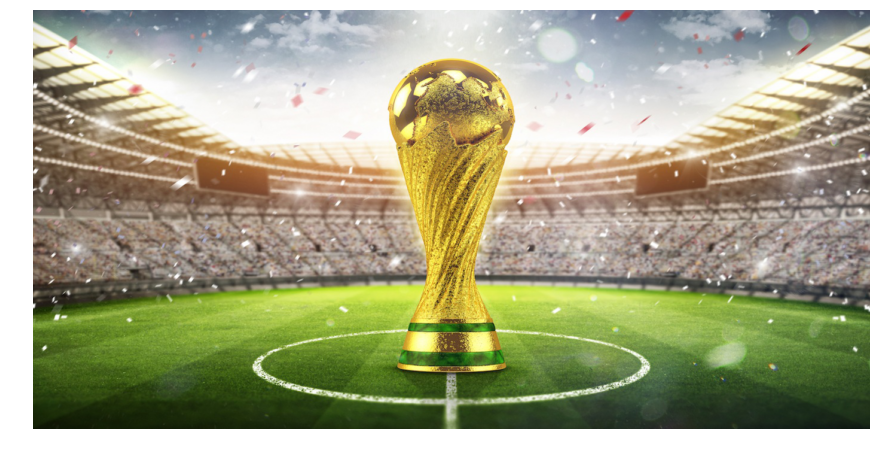

In [17]:
# import libraries
# !pip3 install numpy matplotlib pandas seaborn folium
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import base64
from matplotlib import rc, animation
import folium
import folium.plugins
import os
from PIL import Image
%matplotlib inline
plt.figure(figsize=(15,10))
img = np.array(Image.open(r"/content/FIFA-World-Cup-2018-Online-Video.jpg"))
plt.imshow(img, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [28]:
#Load data
matches = pd.read_csv("/content/WorldCupMatches.csv")
players = pd.read_csv("/content/WorldCupPlayers.csv")
cups = pd.read_csv("/content/WorldCups.csv")
# penalties = pd.read_csv("/content/penalties.csv")
display("MATCHES - DATA")
display(matches.sample(3))
display("PLAYERS - DATA")
display(players.sample(3))
display("CUPS - DATA")
display(cups.sample(3))


'MATCHES - DATA'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
1642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'PLAYERS - DATA'

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37729,255957,300186502,NED,Louis VAN GAAL (NED),N,19,HUNTELAAR,NaN,NaN
37406,255951,300186497,BEL,WILMOTS Marc (BEL),N,20,JANUZAJ,NaN,NaN
15993,308,628,PAR,RE Cayetano (PAR),S,5,Rogelio DELGADO,C,NaN


'CUPS - DATA'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
14,1994,USA,Brazil,Italy,Sweden,Bulgaria,141,24,52,3.587.538
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


# TOTAL ATTENDANCE OF WORLD CUPS BY YEAR

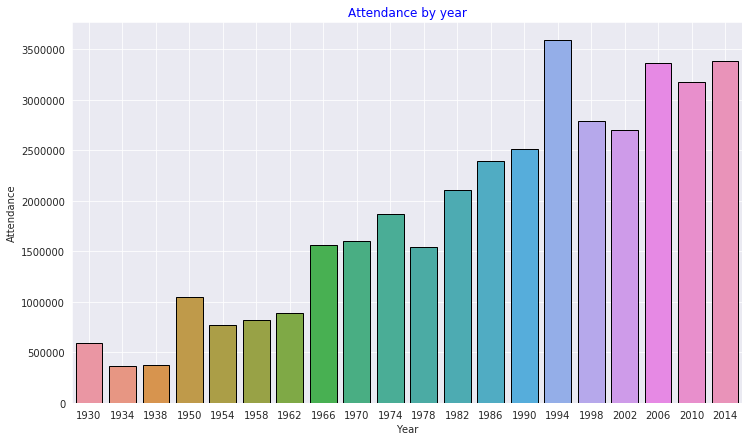

In [31]:
# Checking for null values
matches.isnull().sum()
sns.set_style("darkgrid")
# Remove duplicate rows
matches = matches.drop_duplicates(subset="MatchID", keep="first")
#remove null values for year
matches = matches[matches["Year"].notnull()]
att = matches.groupby("Year")["Attendance"].sum().reset_index()
#convert date to integer
att["Year"] = att["Year"].astype(int)
plt.figure(figsize=(12, 7))
sns.barplot(att["Year"], att["Attendance"], linewidth = 1, edgecolor="k"*len(att))
plt.grid(True)
plt.title("Attendance by year", color="b")
plt.show()